### Install and import necessary libraries

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Load Data

In [3]:
plays = pd.read_csv('plays.csv')

# Exploratory Data Analysis (EDA)

## Data Overview

In [4]:
plays.head()


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [5]:
plays.shape

(12486, 35)

In [6]:
numerical_features = plays.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = plays.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['gameId', 'playId', 'ballCarrierId', 'quarter', 'down', 'yardsToGo', 'yardlineNumber', 'preSnapHomeScore', 'preSnapVisitorScore', 'passLength', 'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'absoluteYardlineNumber', 'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded', 'foulNFLId1', 'foulNFLId2']
Categorical features: ['ballCarrierDisplayName', 'playDescription', 'possessionTeam', 'defensiveTeam', 'yardlineSide', 'gameClock', 'passResult', 'playNullifiedByPenalty', 'offenseFormation', 'foulName1', 'foulName2']


In [7]:
duplicates = plays.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [8]:
plays['yardsToGo'].value_counts()

yardsToGo
10    6386
1      780
5      653
7      555
6      545
8      506
4      495
2      494
3      454
9      431
15     220
11     190
12     133
20     130
13     101
14      95
16      68
18      52
17      48
19      47
21      22
22      20
25      18
23      12
26       8
24       8
27       7
30       3
28       2
36       1
38       1
29       1
Name: count, dtype: int64

In [9]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [10]:
plays.describe()

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,...,12481.000000,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,...,6.424085,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,...,1.014728,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,...,1.000000,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,...,6.000000,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,...,6.000000,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,...,7.000000,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,...,11.000000,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000


In [11]:
plays['passResult'].value_counts()

passResult
C    5634
R     471
Name: count, dtype: int64

In [12]:
plays['playResult'].value_counts()

playResult
 2     1072
 3     1000
 5      995
 4      954
 1      842
       ... 
-39       1
 62       1
 68       1
 81       1
 71       1
Name: count, Length: 97, dtype: int64

### Checking missing values

gameId                                  0
playId                                  0
ballCarrierId                           0
ballCarrierDisplayName                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          167
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
passResult                           6381
passLength                           6852
penaltyYards                        11871
prePenaltyPlayResult                    0
playResult                              0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
offenseFormation                        4
defendersInTheBox                 

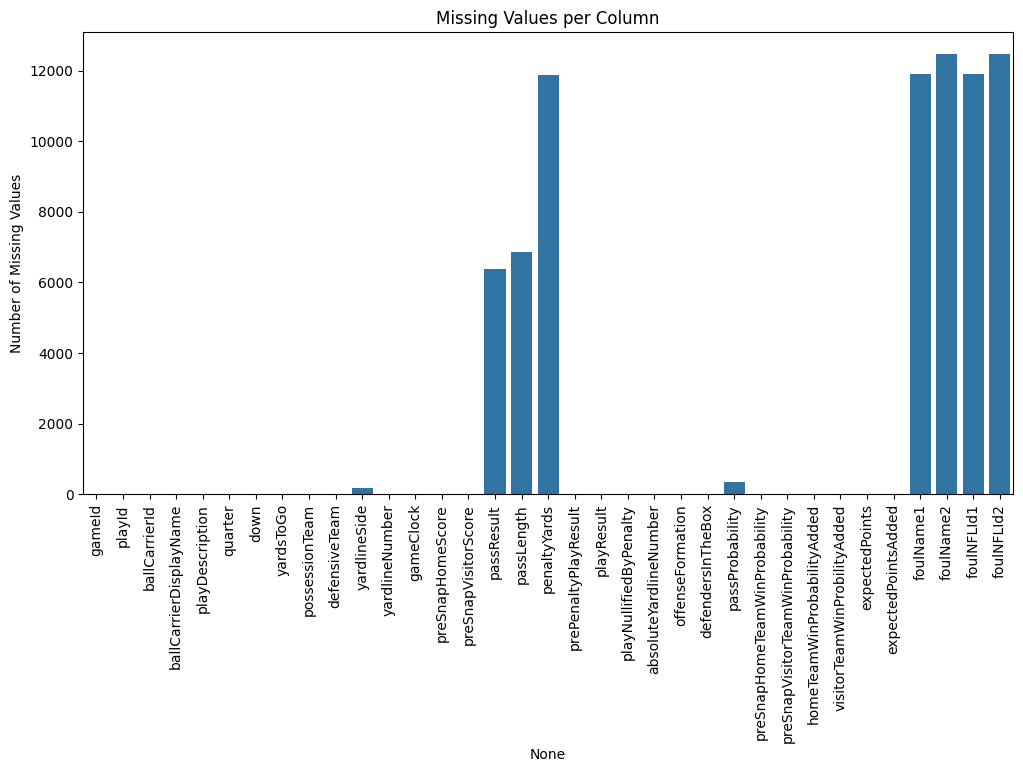

In [13]:
# Count missing values in each column
missing_values = plays.isnull().sum()
print(missing_values)

# Optional: Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.show()


Findings:

Key columns with significant missing values:
passResult: 6,381 missing values.
penaltyYards: 11,871 missing values.
Columns like yardlineSide and defendersInTheBox have minimal missing values and can likely be imputed.

Ideas:

Drop Irrelevant Columns:

Columns like foulName1, foulName2, and penaltyYards have significant missing values and may not be relevant to your model.
Impute missing values for defendersInTheBox using the mean or median.


### Analyze Target Variable (playType)

In [14]:
import numpy as np

plays['playType'] = np.where(plays['passResult'].notna(), 'Pass', 'Rush')

# Check the distribution of playType
print(plays['playType'].value_counts())

playType
Rush    6381
Pass    6105
Name: count, dtype: int64


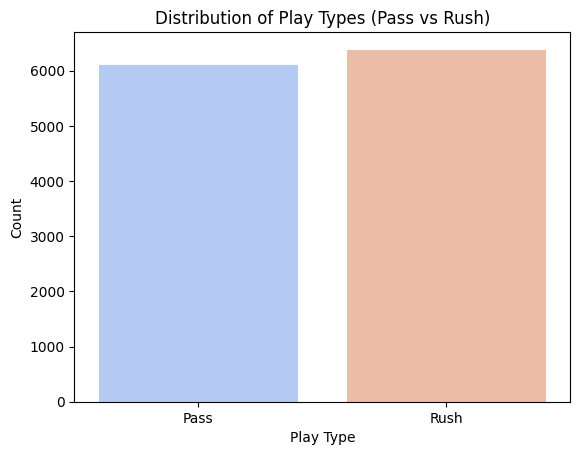

In [15]:
sns.countplot(data=plays, x='playType', hue='playType', dodge=False, palette='coolwarm')
plt.title('Distribution of Play Types (Pass vs Rush)')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

#### Make remaining seconds column from gameClock

In [16]:
# Function to convert MM:SS to total seconds
def convert_to_seconds(clock):
    try:
        minutes, seconds = map(int, clock.split(':'))
        return minutes * 60 + seconds
    except ValueError:  # Handle invalid or missing values
        return None

# Apply the function to create the `remaining_seconds` column
plays['remaining_seconds'] = plays['gameClock'].apply(convert_to_seconds)

# Check the new column
print(plays[['gameClock', 'remaining_seconds']].head())

  gameClock  remaining_seconds
0      7:52                472
1      7:38                458
2      8:57                537
3     13:12                792
4      8:33                513


## Continuous Features Analysis

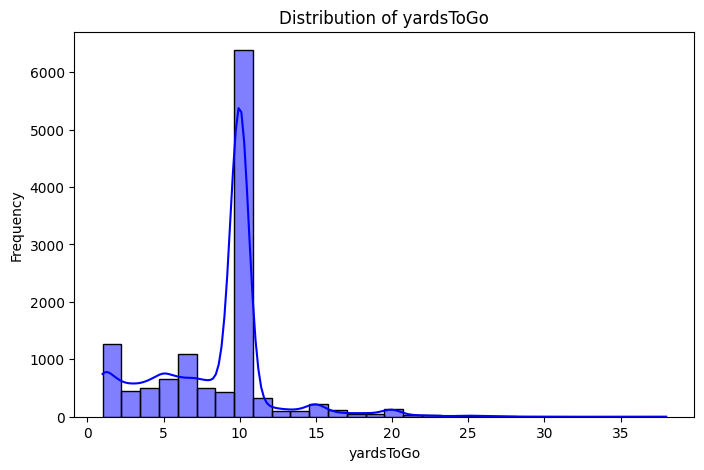

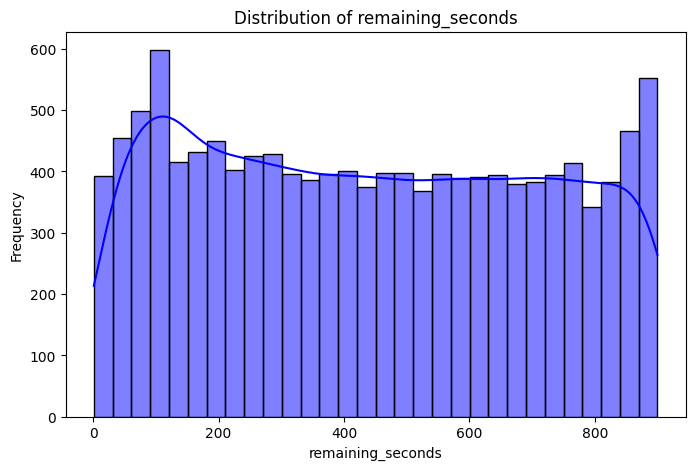

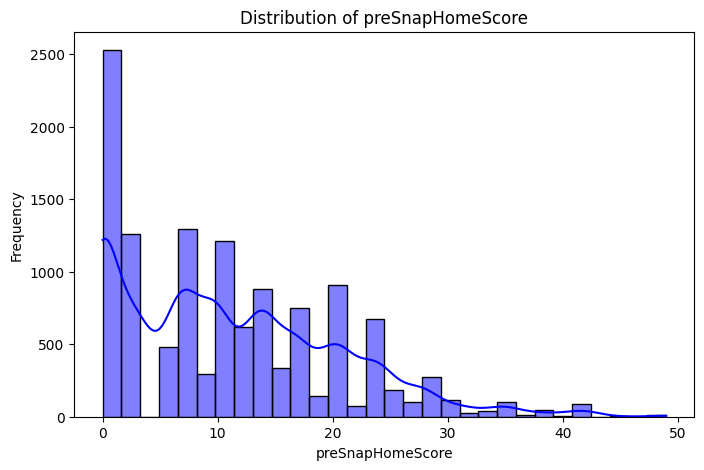

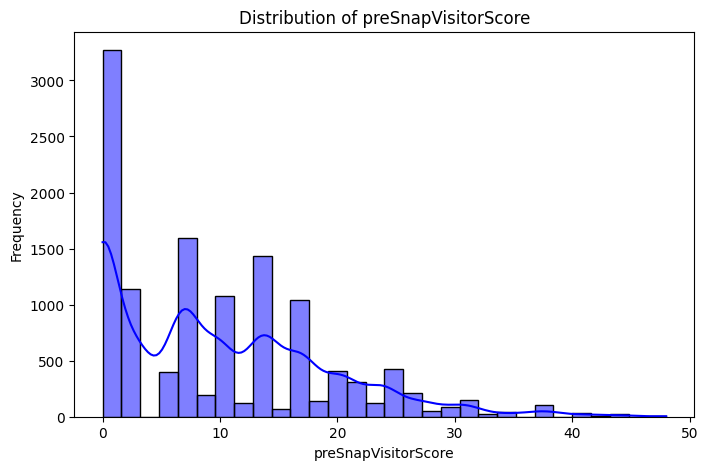

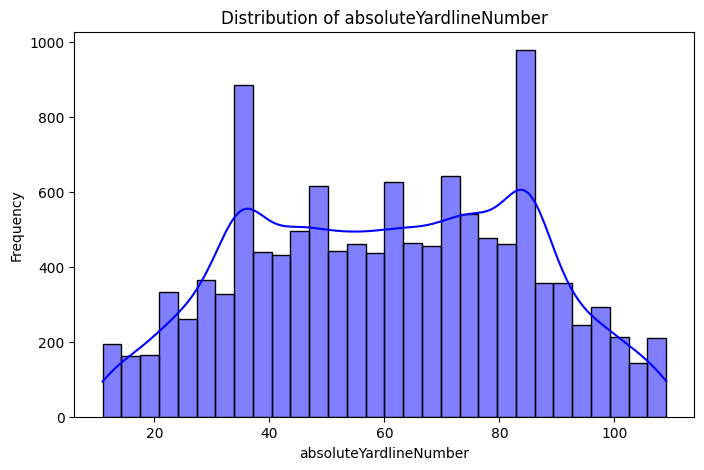

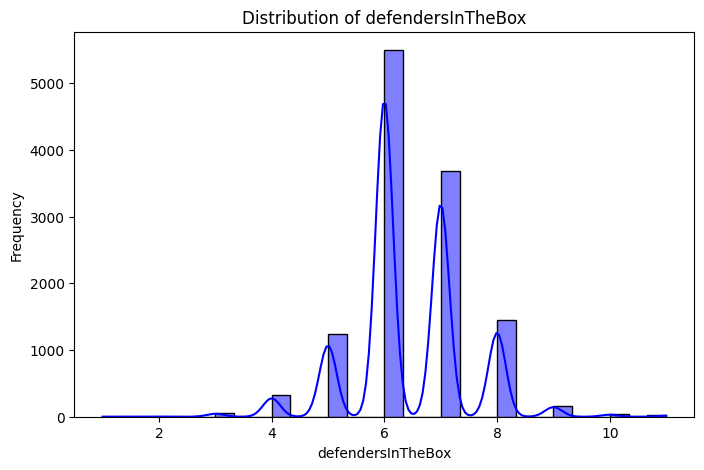

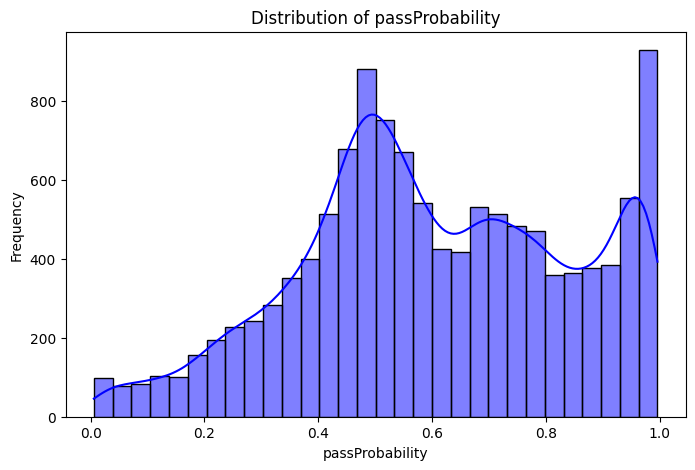

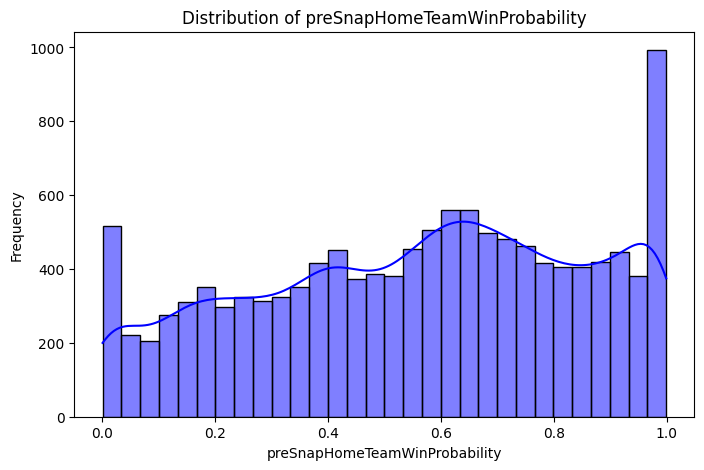

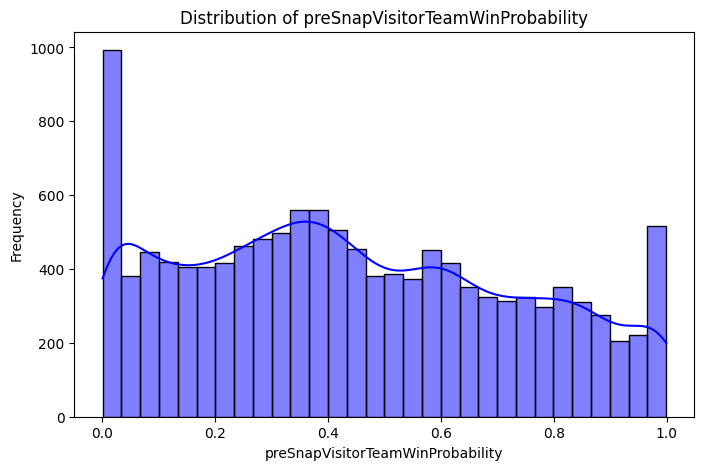

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


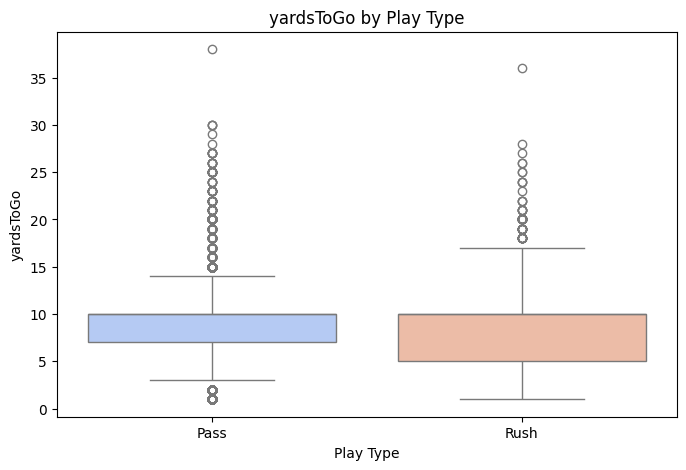

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


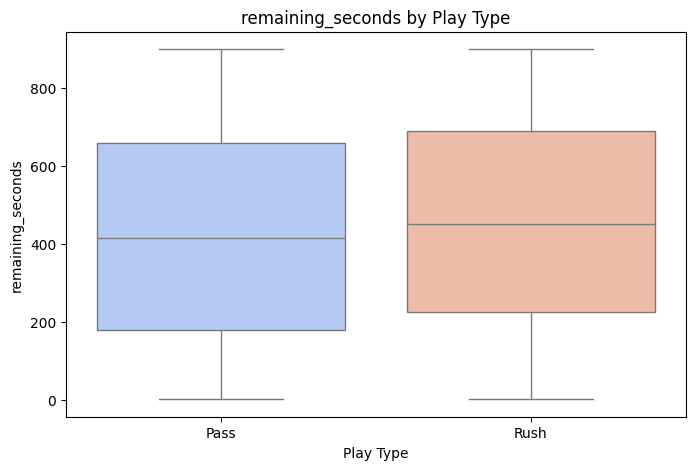

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


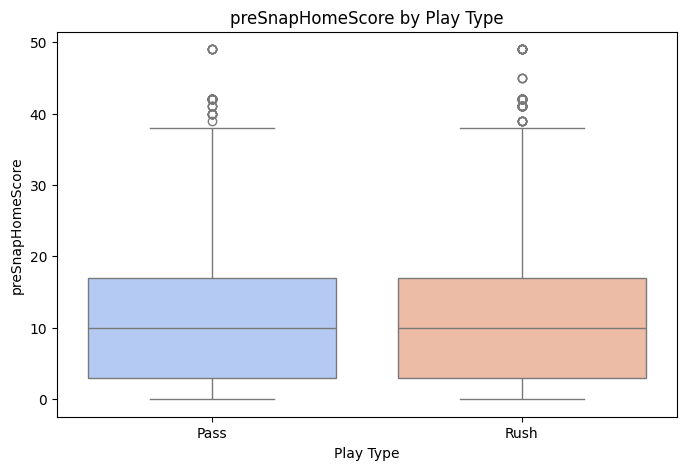

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


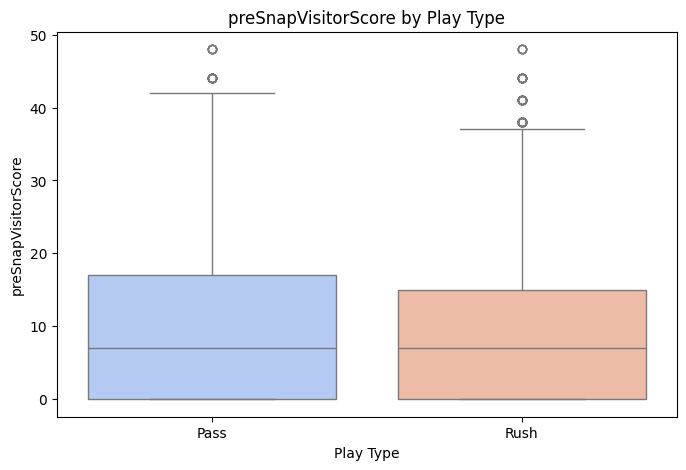

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


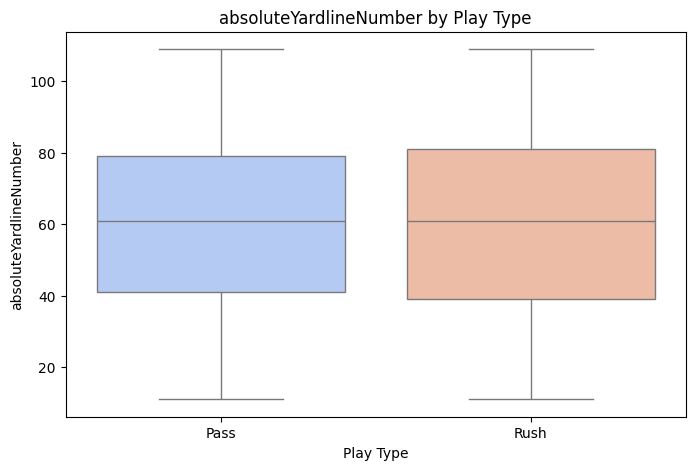

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


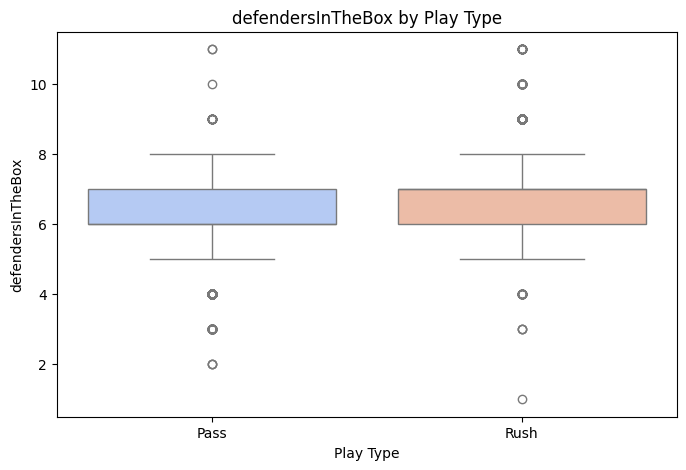

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


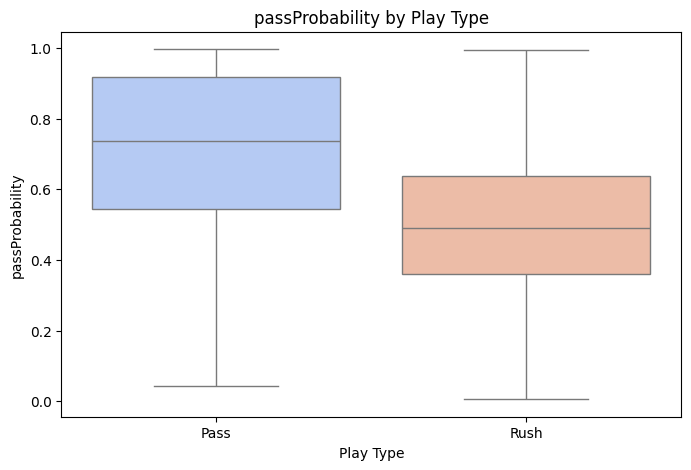

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


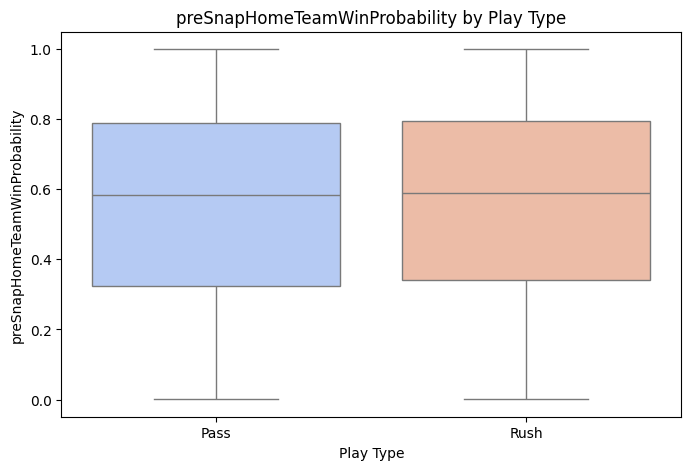

/var/folders/3d/gtb88cpj5zv4nk0q2yhbb0700000gn/T/ipykernel_54231/2460431170.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')


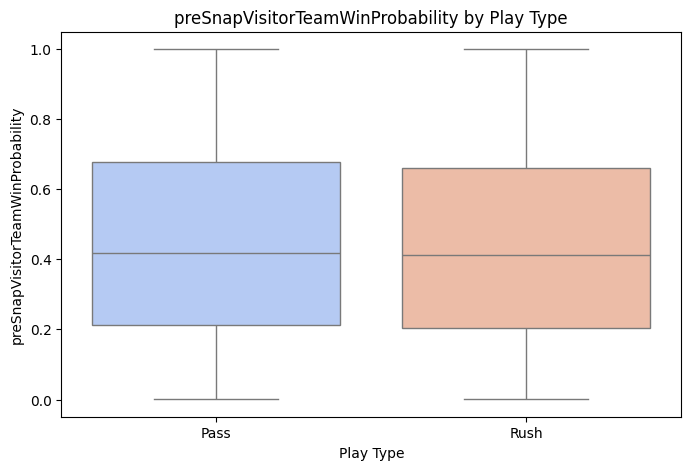

In [17]:
# Define continuous variables
continuous_features = [
    'yardsToGo', 'remaining_seconds', 'preSnapHomeScore', 
    'preSnapVisitorScore', 'absoluteYardlineNumber', 'defendersInTheBox', 
    'passProbability', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability'
]

# Histograms with KDE for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(plays[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to analyze relationship with playType
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=plays, x='playType', y=feature, palette='coolwarm')
    plt.title(f'{feature} by Play Type')
    plt.xlabel('Play Type')
    plt.ylabel(feature)
    plt.show()


## Categorical Features Analysis

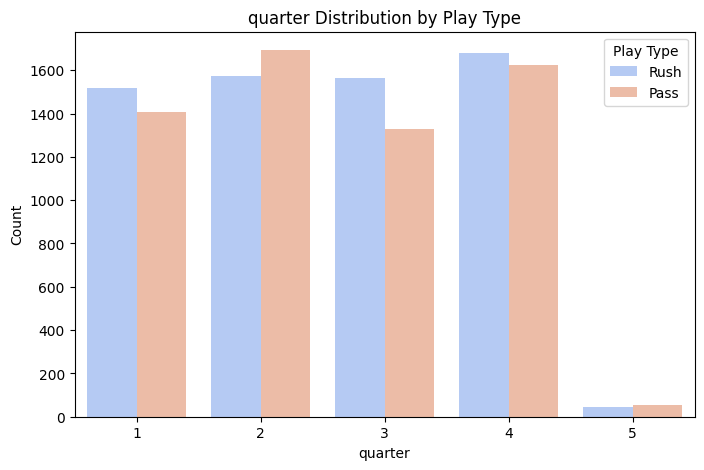

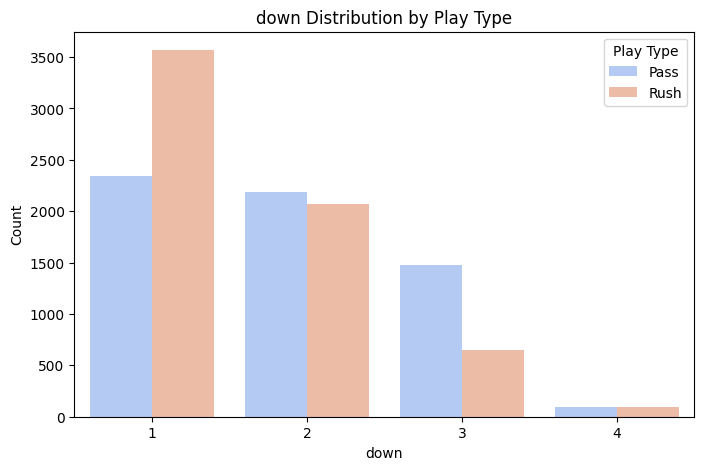

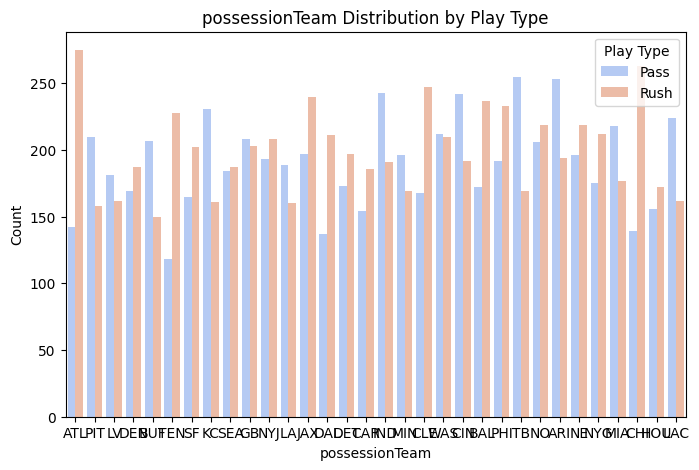

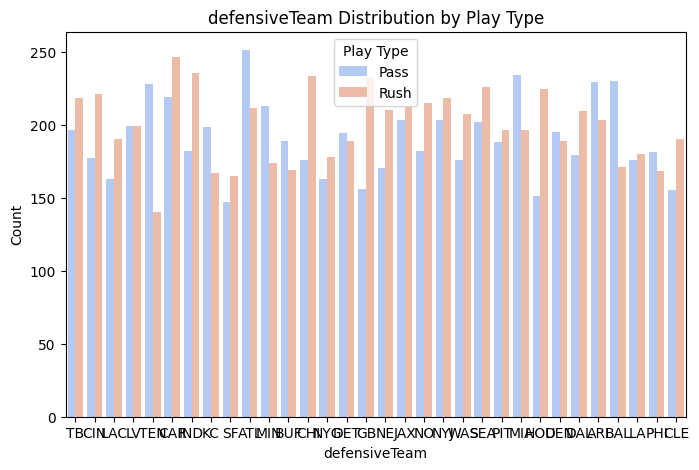

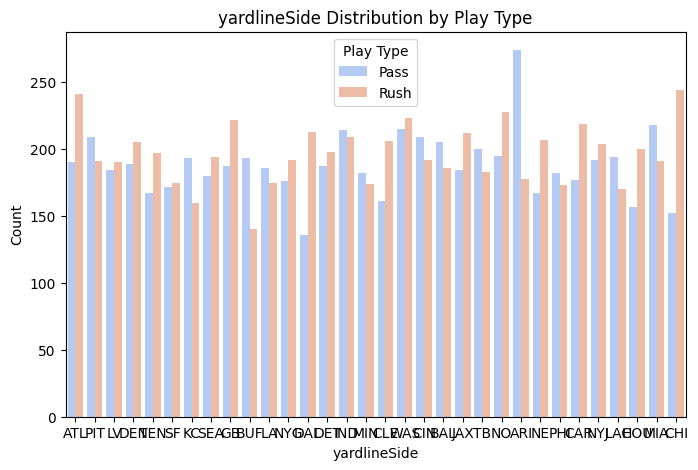

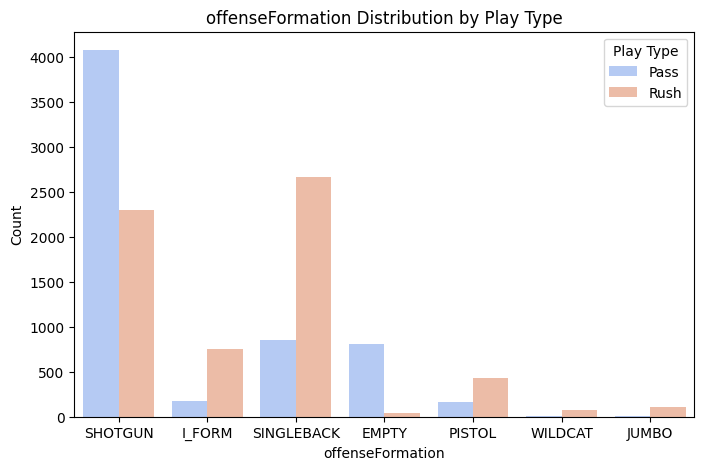

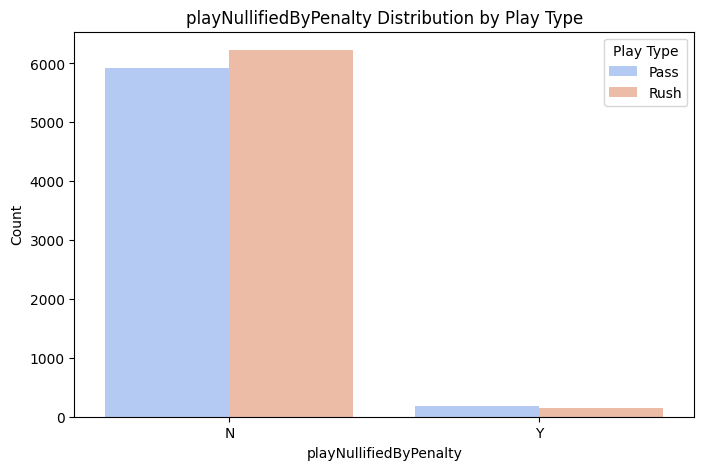

In [18]:
# Define categorical variables
categorical_features = [
    'quarter', 'down', 'possessionTeam', 'defensiveTeam', 
    'yardlineSide', 'offenseFormation', 'playNullifiedByPenalty'
]

# Count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=plays, x=feature, hue='playType', palette='coolwarm')
    plt.title(f'{feature} Distribution by Play Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Play Type')
    plt.show()


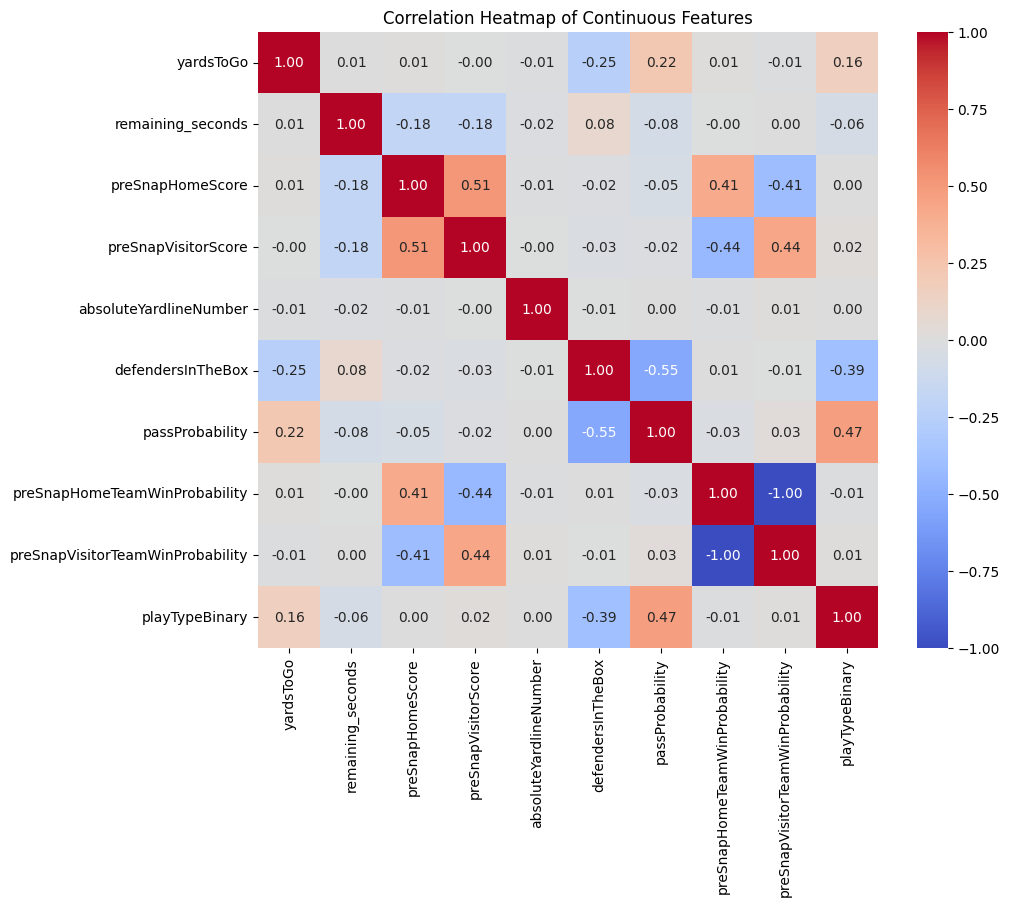

In [19]:
# Add binary playType for correlation (Pass=1, Rush=0)
plays['playTypeBinary'] = plays['playType'].apply(lambda x: 1 if x == 'Pass' else 0)

# Correlation matrix for continuous features + target variable
correlation_matrix = plays[continuous_features + ['playTypeBinary']].corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

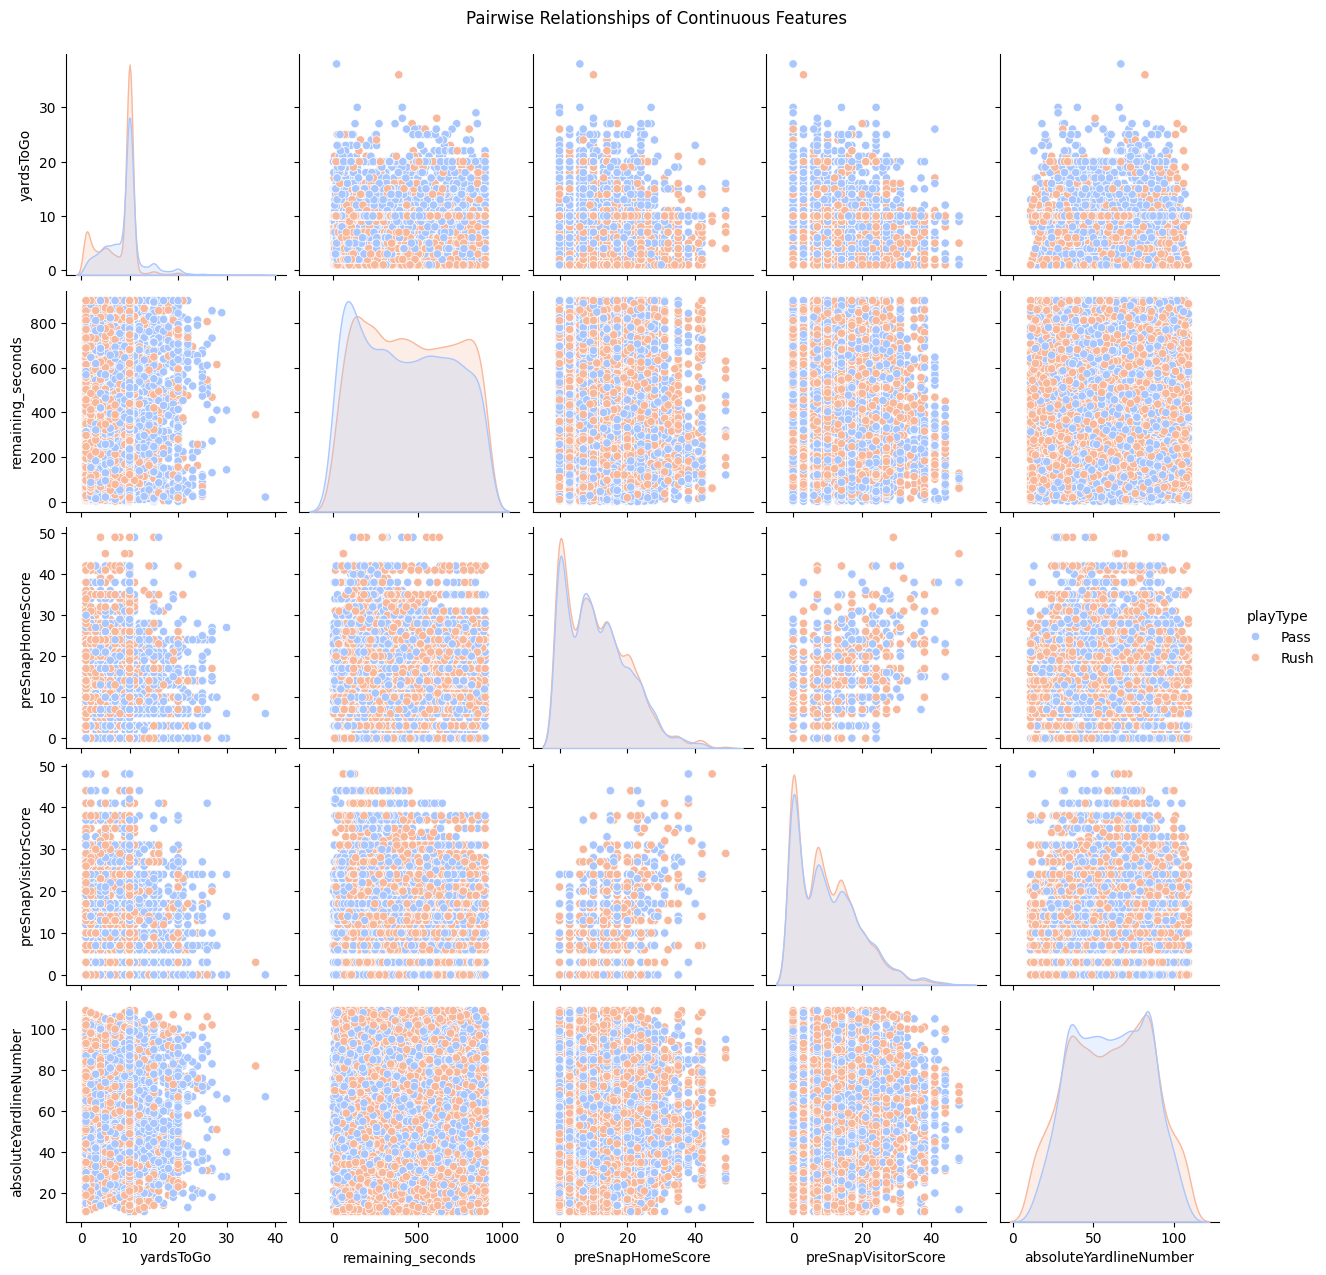

In [20]:
# Pairplot for continuous features grouped by playType
sns.pairplot(plays, vars=continuous_features[:5], hue='playType', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Continuous Features', y=1.02)
plt.show()

# Data Preprocessing

### Creating Target Variable

In [21]:
# Create the target variable 'playType' based on the 'passResult' column
plays['playType'] = plays['passResult'].apply(lambda x: 'Pass' if pd.notna(x) else 'Rush')

# Drop the 'passResult' column as it is now redundant
plays.drop(columns=['passResult'], inplace=True)

### Make `remaining_seconds` variable

In [22]:
# Function to convert 'gameClock' (MM:SS) into total seconds
def convert_to_seconds(clock):
    if isinstance(clock, str):  # Ensure the value is a string
        try:
            minutes, seconds = map(int, clock.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return None
    return None

# Create the 'remaining_seconds' column
plays['remaining_seconds'] = plays['gameClock'].apply(convert_to_seconds)

# Drop the original 'gameClock' column
plays.drop(columns=['gameClock'], inplace=True)

### Dropping data leakage features

In [23]:
# Drop features that provide information after the play (to avoid data leakage)
data_leakage_features = [
    'playResult', 'prePenaltyPlayResult',
    'expectedPoints', 'expectedPointsAdded',
    'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'passLength'
]
plays.drop(columns=data_leakage_features, inplace=True)


### Handling Missing Values

In [24]:
# Impute missing values for specific columns
plays['defendersInTheBox'] = plays['defendersInTheBox'].fillna(plays['defendersInTheBox'].mode()[0])  # Mode for ordinal feature
plays['yardlineSide'] = plays['yardlineSide'].fillna(plays['yardlineSide'].mode()[0])  # Mode for categorical feature
plays['passProbability'] = plays['passProbability'].fillna(plays['passProbability'].mean())  # Mean for continuous feature

### Removing irrelevant features

In [25]:
# Drop irrelevant features
irrelevant_features = [
    'gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
    'playDescription', 'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'
]
plays.drop(columns=irrelevant_features, inplace=True)

## Exploring feature importance

In [26]:
plays.head()

,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,penaltyYards,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,playType,remaining_seconds,playTypeBinary
0,4,1,10,ATL,TB,ATL,41,21,7,NaN,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,Pass,472,1
1,4,1,10,PIT,CIN,PIT,34,14,20,NaN,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,Rush,458,0
2,2,2,5,LV,LAC,LV,30,10,3,NaN,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,Pass,537,1
3,3,2,10,DEN,LV,DEN,37,19,16,NaN,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,Rush,792,0
4,2,1,10,BUF,TEN,TEN,35,7,7,NaN,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,Rush,513,0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Define the features (X) and target variable (y)
X = plays.drop(columns=['playType', 'playTypeBinary'])  # Ensure they are excluded
y = plays['playType']  # Target variable

# Convert categorical variables to dummy/one-hot encoded format
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

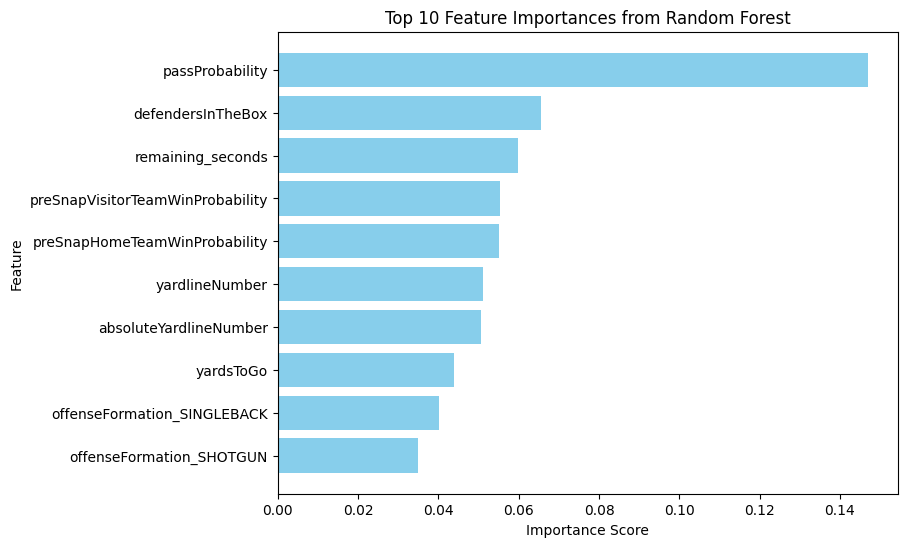

In [28]:
# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Select the top 10 most important features
top_n = 10
top_features = feature_importance_df.head(top_n)

# Plot the feature importance for the top features
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
